<a href="https://colab.research.google.com/github/Haidero/Machine_Learning/blob/master/Zeeshan_Haider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Midterm Project - Enhanced Version

**Name: Zeeshan Haider**

**Objective:**

**1.** Predict a patient’s medical insurance cost based on personal health info.

**2.** Classify whether a patient is a high-risk (e.g., very high medical cost expected)

In [ ]:
# Exam Tasks
# Part 1: Data Preparation & Feature Engineering (20 Marks)
# Handle missing values (if any).
# Encode categorical variables (sex, smoker, region).
# Create new features if required
# Define a binary target for classification:

**Part 1: Data Preparation & Feature Engineering**

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Upoad dataset in google drive

In [ ]:
#connect google drive to get data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Datasets/dataset.csv')

In [ ]:
#to check data type,null values, columns etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#summary statistics table of dataset like
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#to check null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No null vaule found in data.
so now as df.info show that data type of sex, smoker and region are categorical/object so convert into number/integer by using label encoder

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
#check all
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
pd.get_dummies(df.region)

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [ ]:
# One-hot encode 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
# Feature Engineering
df['smoker_bmi'] = df['smoker'] * df['bmi']
df['smoker_age'] = df['smoker'] * df['age']
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2
df['obese'] = (df['bmi'] >= 30).astype(int)
df['has_children'] = (df['children'] > 0).astype(int)
df['risk_score'] = df['smoker'] * (df['bmi']/30 + df['age']/50)

In [ ]:
# Define binary classification target
df['high_risk'] = (df['charges'] > df['charges'].quantile(0.75)).astype(int)

# **Part 2:** Regression – Predicting Medical Cost

**Use Linear Regression to predict charges.**

**Tasks:**

1. EDA: Visualize how charges vary with age, bmi, smoker status, etc.

2. Train-test split (80/20).

3. Train a Linear Regression model.

4. Evaluate using:
oRMSE, R² Score

5. Analyze model coefficients – which features impact cost the most?

6.  bold text Plot actual vs predicted charges.

**1.** EDA: Visualize how charges vary with age, bmi, smoker status, etc.

In [ ]:
# 1. Scatter Plot for Age vs Charges

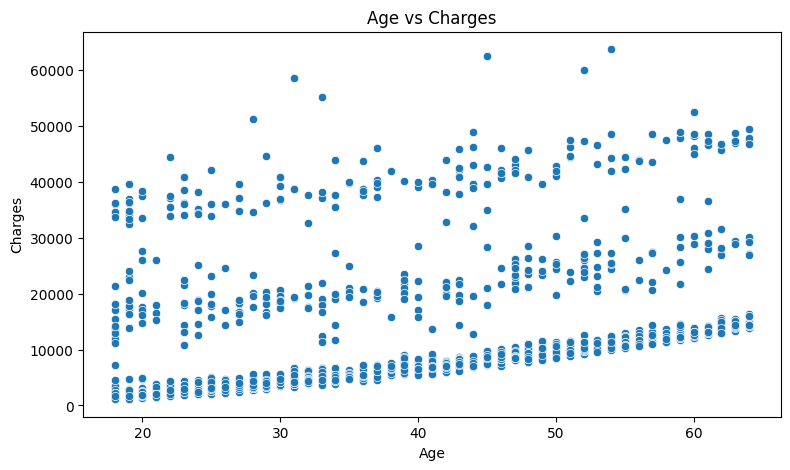

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Age vs Charges
plt.figure(figsize=(9, 5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [ ]:
# 2. Scatter Plot for BMI vs Charges

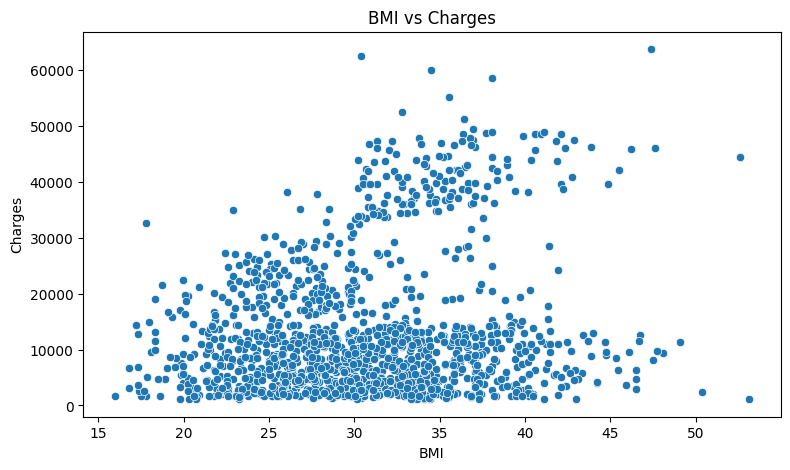

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [ ]:
# 3. Box Plot for Smoker Status vs Charges

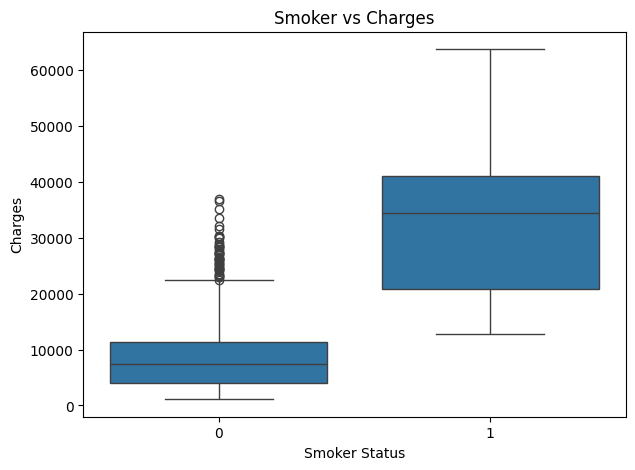

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.show()

In [ ]:
# 5. Correlation Heatmap

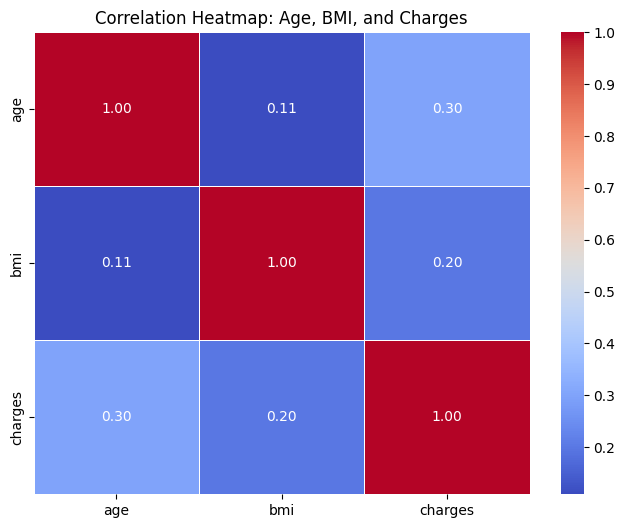

In [ ]:
# Correlation Heatmap
correlation_matrix = df[['age', 'bmi', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Age, BMI, and Charges')
plt.show()

In [ ]:
#import libraries of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

**2.** Train-test split (80/20). &

**3.** Train a Linear Regression model.

In [ ]:

X = df.drop(['charges', 'high_risk'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

**4.** Evaluate using:
oRMSE, R² Score

In [ ]:
# Evaluation MSE: Root Mean Squared Error, R²: R-squared (Coefficient of Determination), MAE: Mean Absolute Error Explained Variance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}, Explained Variance: {evs:.2f}")

RMSE: 4622.28, R²: 0.87, MAE: 2781.20, Explained Variance: 0.87


**5.** Analyze model coefficients

In [ ]:
# Coefficient analysis
coef_df = pd.DataFrame({'Feature': X.columns, 'Impact': lr.coef_}).sort_values(by='Impact', ascending=False)
print(coef_df.head())

         Feature       Impact
12         obese  3069.549184
8     smoker_bmi  1468.514445
13  has_children   472.141604
3       children   444.851344
2            bmi    78.556695


#Which features impact cost the most?

**Obese (Feature 12) & Smoker BMI (Feature 8):**

As coeefecient model show Has the biggest impact on predictions, likely due to its strong link with health risks and medical costs.


**Has Children (Feature 13) & Children (Feature 3):**

 Moderately impacts predictions, indicating that having children affects healthcare costs due to dependent care needs.


**BMI (Feature 2):**

Has a smaller impact compared to obesity and smoking, but still plays a role in predicting healthcare costs.


In [ ]:
# 6. Actual vs Predicted

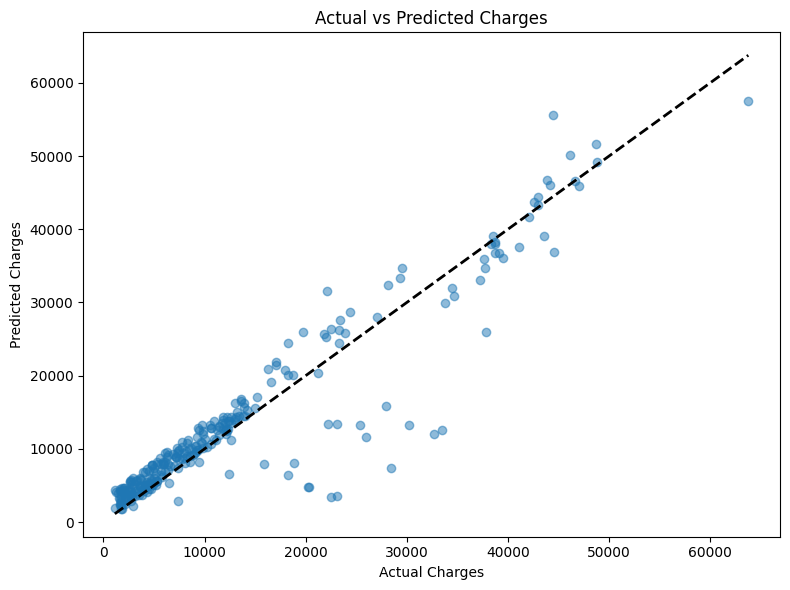

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.tight_layout()
plt.show()

# Part 3: Classification – High-Risk Detection

Use Decision Tree Classifier to predict if a patient is high-risk.

**1.** Train a Decision Tree Classifier to predict high_risk.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming your DataFrame is named 'df'
X = df.drop(['charges', 'high_risk'], axis=1)
y = df['high_risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Adjust test_size as needed

DecisionTreeClassifier(max_depth=4, min_samples_split=10)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=30)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Decision tree visualization saved as 'decision_tree.svg'


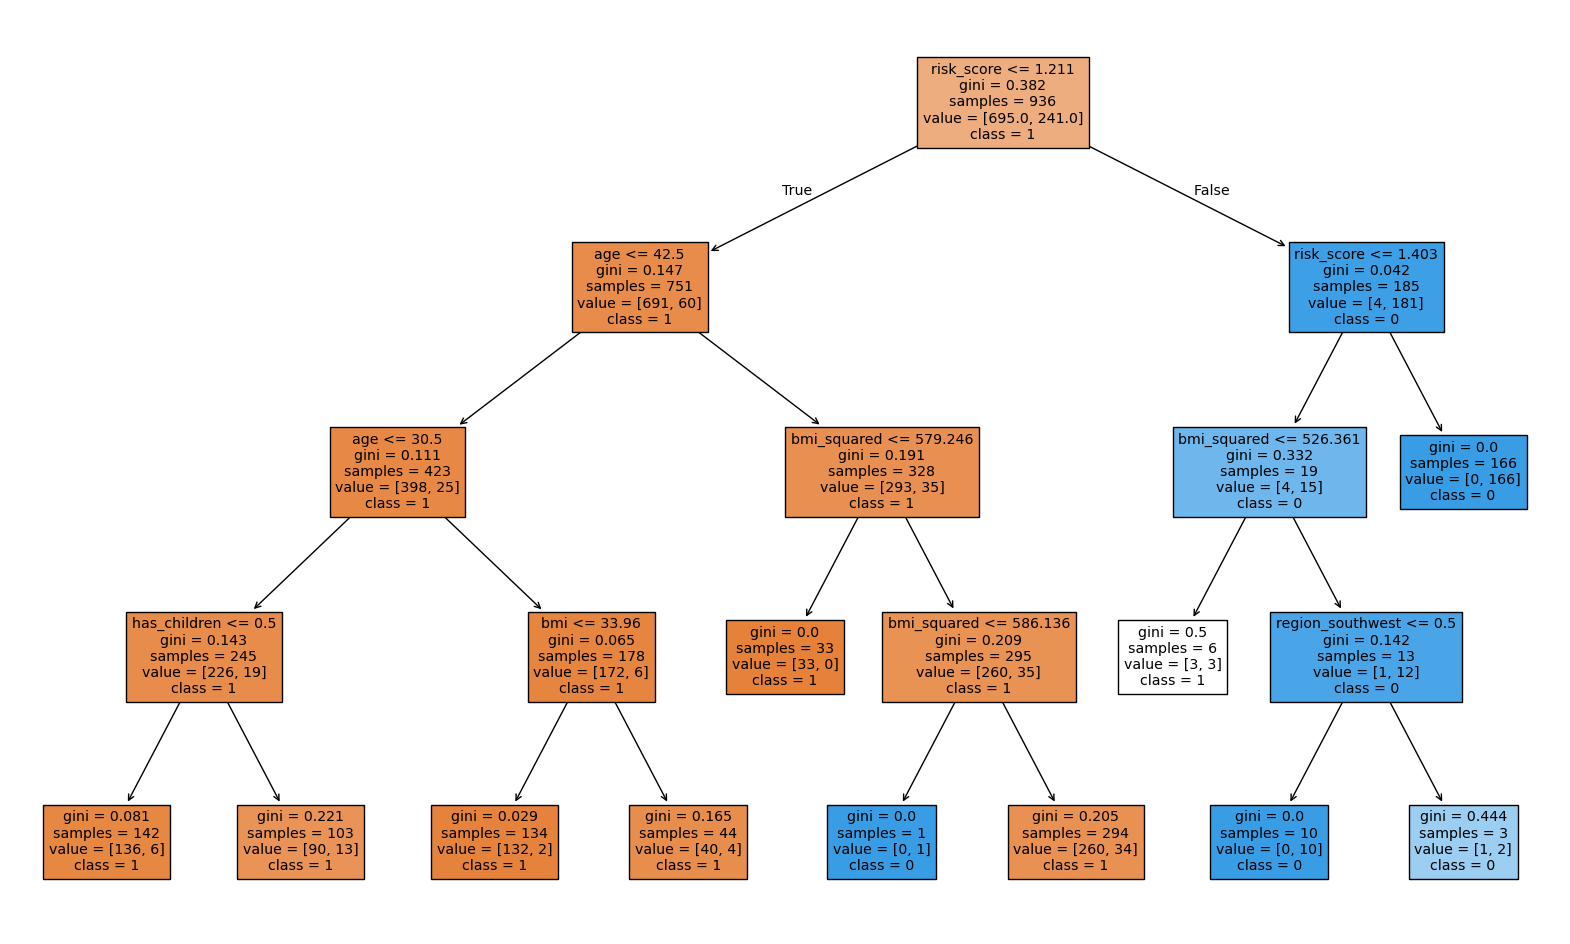

In [ ]:
# Visualize and Save the Tree
plt.figure(figsize=(20, 12))  # Adjust figure size as needed for clarity
plot_tree(model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)

# Save the plot as an SVG file (good for scalability)
plt.savefig('decision_tree.svg', format='svg', bbox_inches='tight')
print("Decision tree visualization saved as 'decision_tree.svg'")

**Calculate evaluation metrics**


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'binary' if y has only two classes
recall = recall_score(y_test, y_pred, average='weighted')    # Use 'binary' if y has only two classes
f1 = f1_score(y_test, y_pred, average='weighted')        # Use 'binary' if y has only two classes
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-score: 0.93

Confusion Matrix:
[[304   4]
 [ 22  72]]


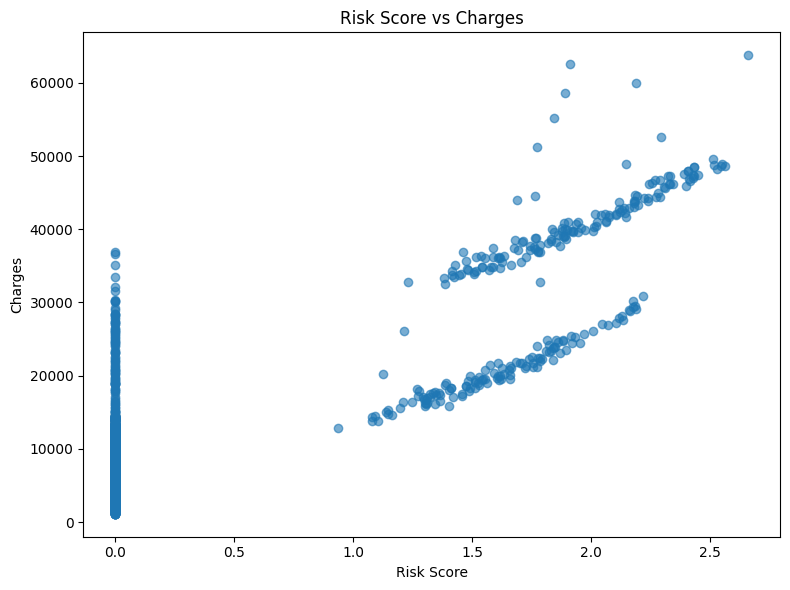

In [ ]:
# Risk score vs charges
plt.figure(figsize=(8, 6))
plt.scatter(df['risk_score'], df['charges'], alpha=0.6)
plt.xlabel('Risk Score')
plt.ylabel('Charges')
plt.title('Risk Score vs Charges')
plt.tight_layout()
plt.show()

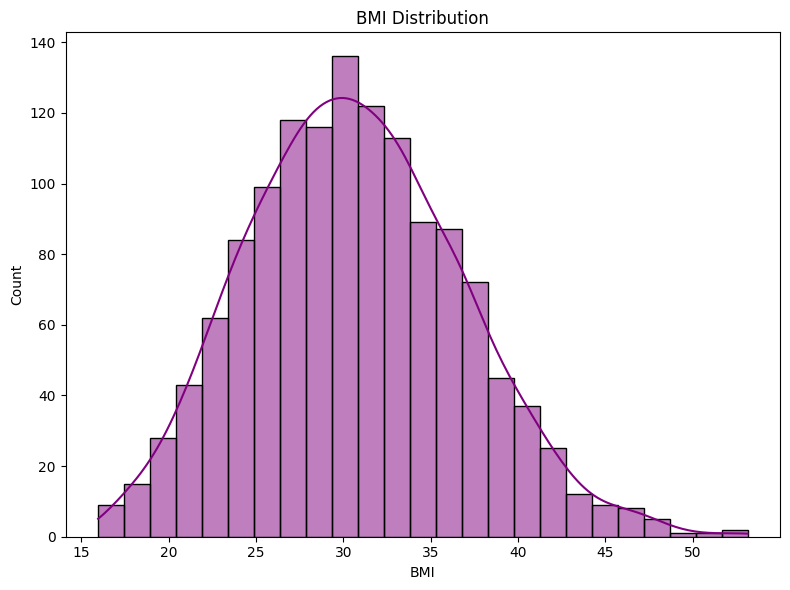

In [ ]:
# BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, color='Purple')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

**✅ What makes someone high risk?**

A person is considered high risk if:

*   They are a smoker
*   Have a high BMI (especially if they are obese)
*   Are older in age

These factors are linked to higher medical charges and more health problems, which increases the cost of insurance.

**✅ Which features drive medical cost?**

The most important features that drive medical costs are:

*   Smoker status – smokers pay much more
*   BMI – higher BMI usually means more health risks

*   Age – older people tend to have higher charges
*   Number of children and region have a smaller effect

Interaction features like smoker × BMI and smoker × age also increase cost